In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_pickle('dataset.pickle') # non tagliato, lo uso solo per i nomi delle colonne
cols = df.columns.tolist()

In [6]:
features = df[cols[3:4] + cols[23:]]
features.head()

,Week,LagoComo_Altezza_1w,LagoComo_Altezza_4w,LagoComo_Altezza_8w,LagoComo_Altezza_12w,LagoComo_Altezza_16w,LagoComo_Altezza_24w,Maggiore_Altezza_1w,Maggiore_Altezza_4w,Maggiore_Altezza_8w,...,Temp8w_piemonte sud,Temp12w_piemonte sud,Temp16w_piemonte sud,Temp24w_piemonte sud,Temp1w_ticino,Temp4w_ticino,Temp8w_ticino,Temp12w_ticino,Temp16w_ticino,Temp24w_ticino
0,7,-0.255714,-0.186071,-0.087321,0.069107,0.263304,0.351012,0.332857,0.406071,0.654107,...,3.267624,3.350167,4.588464,7.976680,1.692096,0.247981,-0.954779,-0.808797,0.569654,4.215205
1,8,-0.250000,-0.220536,-0.131786,0.001012,0.171786,0.332143,0.304286,0.354286,0.549286,...,3.788842,3.540440,4.123462,7.476028,0.357593,0.323533,-0.525850,-0.745402,-0.058010,3.643710
2,9,-0.253571,-0.243393,-0.168125,-0.055655,0.106027,0.317113,0.255714,0.312500,0.456964,...,4.111640,3.511416,3.750136,6.872391,0.104379,1.295578,-0.193304,-0.807406,-0.511072,2.986071
3,10,-0.253571,-0.253214,-0.196518,-0.102679,0.046384,0.308333,0.237143,0.282500,0.384464,...,4.437311,3.750828,3.706417,6.426157,1.443758,0.899457,0.054039,-0.645076,-0.601180,2.440699
4,11,-0.282143,-0.259821,-0.222946,-0.144821,-0.013125,0.273810,0.185714,0.245714,0.325893,...,5.394804,4.314798,4.114912,6.124964,5.726196,1.907981,1.077981,-0.000525,-0.129602,2.130335


In [7]:
cols = features.columns.tolist()
features_list = list(zip(range(len(features.columns)), features.columns.tolist()))
features_list

[(0, 'Week'),
 (1, 'LagoComo_Altezza_1w'),
 (2, 'LagoComo_Altezza_4w'),
 (3, 'LagoComo_Altezza_8w'),
 (4, 'LagoComo_Altezza_12w'),
 (5, 'LagoComo_Altezza_16w'),
 (6, 'LagoComo_Altezza_24w'),
 (7, 'Maggiore_Altezza_1w'),
 (8, 'Maggiore_Altezza_4w'),
 (9, 'Maggiore_Altezza_8w'),
 (10, 'Maggiore_Altezza_12w'),
 (11, 'Maggiore_Altezza_16w'),
 (12, 'Maggiore_Altezza_24w'),
 (13, 'Lugano_Altezza_1w'),
 (14, 'Lugano_Altezza_4w'),
 (15, 'Lugano_Altezza_8w'),
 (16, 'Lugano_Altezza_12w'),
 (17, 'Lugano_Altezza_16w'),
 (18, 'Lugano_Altezza_24w'),
 (19, 'LagoIseo_Altezza_1w'),
 (20, 'LagoIseo_Altezza_4w'),
 (21, 'LagoIseo_Altezza_8w'),
 (22, 'LagoIseo_Altezza_12w'),
 (23, 'LagoIseo_Altezza_16w'),
 (24, 'LagoIseo_Altezza_24w'),
 (25, 'Prec1w_adda'),
 (26, 'Prec4w_adda'),
 (27, 'Prec8w_adda'),
 (28, 'Prec12w_adda'),
 (29, 'Prec16w_adda'),
 (30, 'Prec24w_adda'),
 (31, 'Prec1w_dora'),
 (32, 'Prec4w_dora'),
 (33, 'Prec8w_dora'),
 (34, 'Prec12w_dora'),
 (35, 'Prec16w_dora'),
 (36, 'Prec24w_dora'),
 (37,

# Target aree singole

## Delta < 0.05

In [8]:
adda = [161]
dora = [167]
emi1 = [42]
emi2 = [172]
garda = [96]
lambro = [110]
oglio = [96]
piemnord = [96]
piemsud = [136]
ticino = [149]

aree = [adda,dora,emi1,emi2,garda,lambro,oglio,piemnord,piemsud,ticino]

In [9]:
aree = list(itertools.chain.from_iterable(aree))
common_features = list(dict.fromkeys(aree))
common_features.sort()
selected_features = [f[1] for f in features_list if f[0] in common_features]
feat_dict = list(zip(common_features,selected_features))

In [10]:
aree = [adda,dora,emi1,emi2,garda,lambro,oglio,piemnord,piemsud,ticino]
for i in range(len(aree)):
    aree[i] = [1 if f[0] in aree[i] else 0 for f in feat_dict]
    aree[i] = dict(list(zip(selected_features,aree[i])))

In [11]:
colors = ['blue','midnightblue','yellow','orange','aqua','steelblue','lawngreen','slategrey','red','magenta']

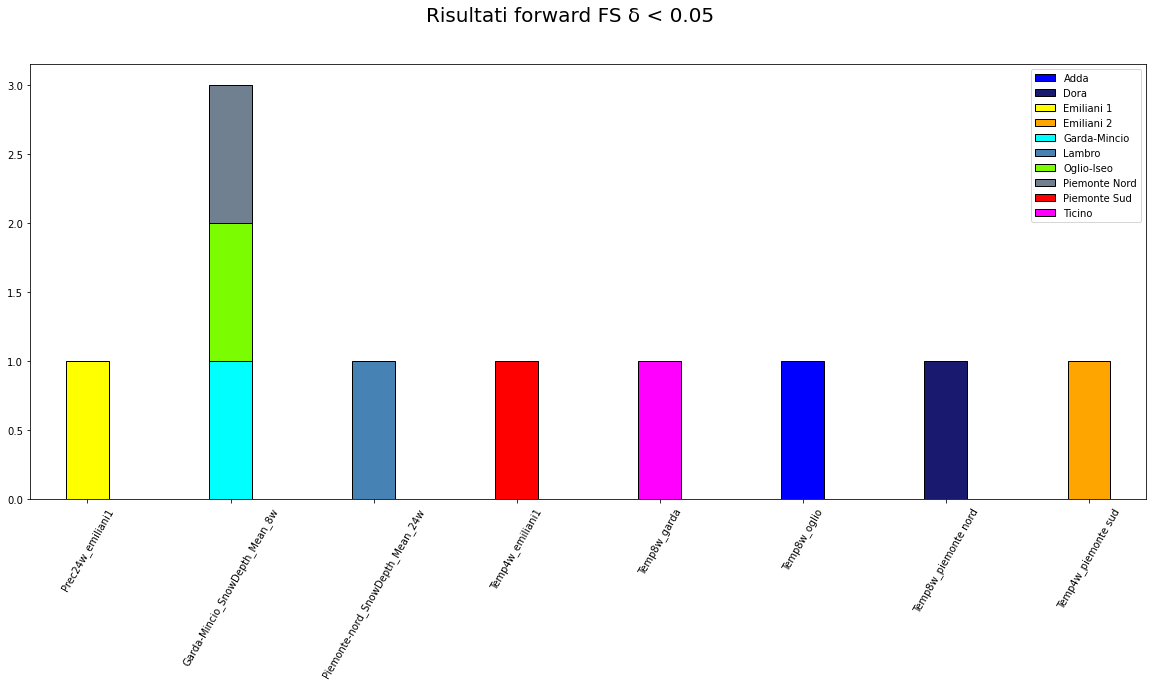

In [12]:
ax = pd.DataFrame(aree).T.plot(kind='bar',figsize=(20,8), stacked=True ,width=0.3, color=colors, rot=60, edgecolor='black')
plt.gcf().suptitle("Risultati forward FS \u03B4 < 0.05",fontsize=20)
ax.legend(['Adda','Dora','Emiliani 1', 'Emiliani 2', 'Garda-Mincio', 'Lambro', 'Oglio-Iseo', 'Piemonte Nord', 'Piemonte Sud','Ticino'])

## Delta >= 0.05

In [13]:
adda = [161, 95, 44, 101, 125, 100]
dora = [167, 52, 148, 125, 85, 144, 11, 137, 179, 143, 149, 161, 156, 162]
emi1 = [42, 170, 142, 66, 128, 134]
emi2 = [172, 42, 134, 140, 170, 128]
garda = [96, 45, 158, 42, 128, 0, 36, 97, 146]
lambro = [110, 24, 6, 122]
oglio = [96, 174, 45, 100, 42, 127, 85, 41, 126, 180]
piemnord = [96, 136, 74, 168, 48, 125, 174]
piemsud = [136, 42, 85, 74, 142, 148]
ticino = [149, 95, 44, 156, 161, 125, 143]

aree = [adda,dora,emi1,emi2,garda,lambro,oglio,piemnord,piemsud,ticino]

In [14]:
aree = list(itertools.chain.from_iterable(aree))
common_features = list(dict.fromkeys(aree))
common_features.sort()
selected_features = [f[1] for f in features_list if f[0] in common_features]
feat_dict = list(zip(common_features,selected_features))

In [15]:
aree = [adda,dora,emi1,emi2,garda,lambro,oglio,piemnord,piemsud,ticino]
for i in range(len(aree)):
    aree[i] = [1 if f[0] in aree[i] else 0 for f in feat_dict]
    aree[i] = dict(list(zip(selected_features,aree[i])))

In [16]:
colors = ['blue','midnightblue','yellow','orange','aqua','steelblue','lawngreen','slategrey','red','magenta']

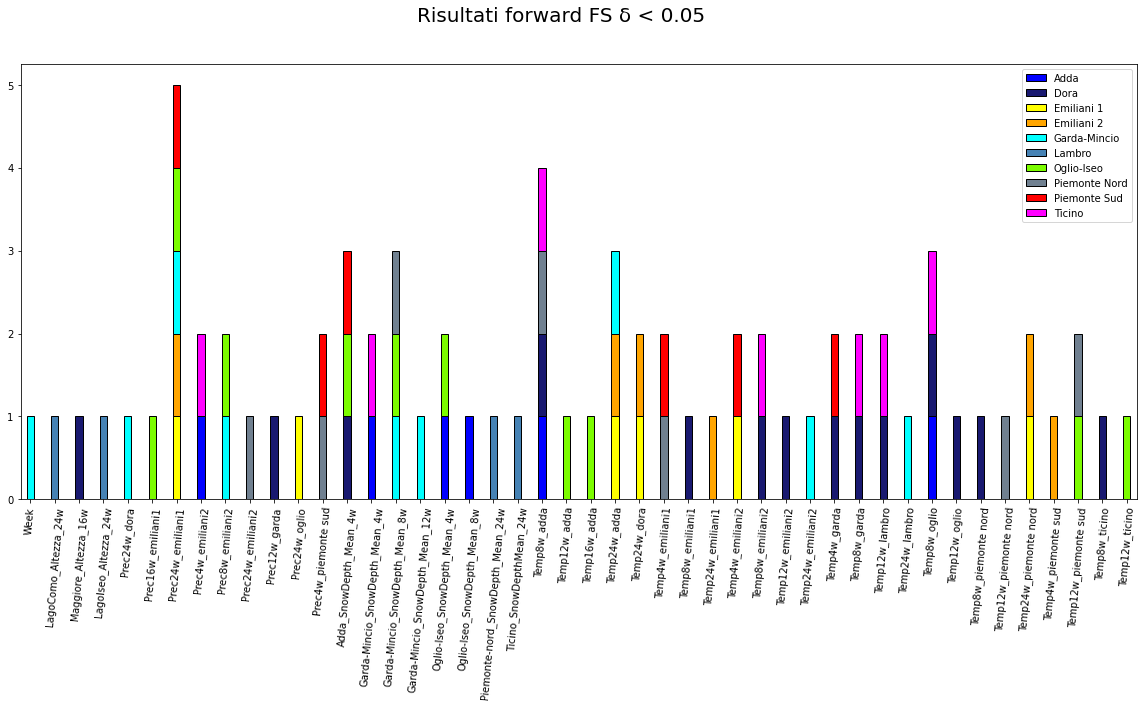

In [19]:
ax = pd.DataFrame(aree).T.plot(kind='bar',figsize=(20,8), stacked=True ,width=0.3, color=colors, rot=85, edgecolor='black')
plt.gcf().suptitle("Risultati forward FS \u03B4 < 0.05",fontsize=20)
ax.legend(['Adda','Dora','Emiliani 1', 'Emiliani 2', 'Garda-Mincio', 'Lambro', 'Oglio-Iseo', 'Piemonte Nord', 'Piemonte Sud','Ticino'])